In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h1>Radial velocity method</h1>

The radial velocity method looks at changes in the line-of-sight velocity of the star as it moves around the centre of mass. The purpose of this notebook is to visualize the concepts explained in the lectures. In the following, we assume that every orbit is viewed edge-on (so that $\sin i=1$); for inclined orbits all velocities and planet masses should be multiplied by $\sin i$. The observer is assumed to be located far away on the negative x-axis. Below is an example for a Jupiter-mass planet orbiting at 1 AU around a Solar-mass star. Negative radial velocity means the star is moving towards the observer; a positive radial velocity means that the star is moving away from the observer. 


<IPython.core.display.Javascript object>


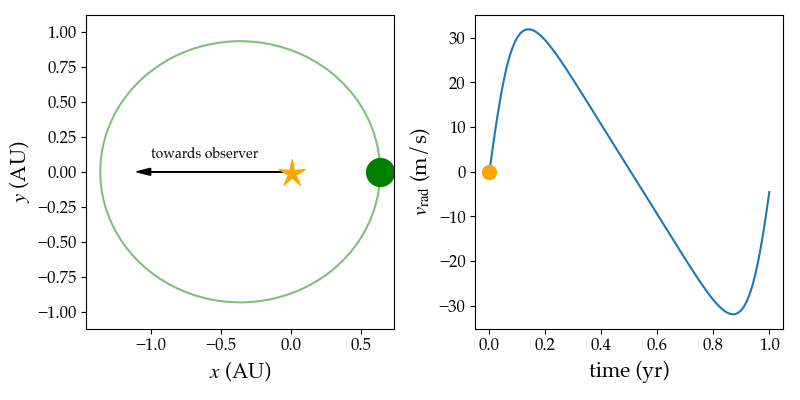

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, update_display, HTML
import ipywidgets as widgets

from nbody import nbody as nb
from nbody import plot as p

# Try and make plots look nice
plt.rcParams["font.family"] = 'serif'
plt.rcParams["mathtext.fontset"] = 'stix'
plt.rcParams["font.serif"] = 'Palatino'
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

orb = nb.Orbit(mass_ratio=0.001, eccentricity=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.axis('equal')

ax1.set_xlabel(r'$x$ (AU)', fontsize=15)
ax1.set_ylabel(r'$y$ (AU)', fontsize=15)

ax1.arrow(0, 0, -1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax1.text(-1, 0.1, r'towards observer')

plot_p, = ax1.plot(np.asarray(orb.plan_pos)[:,0], 
                  np.asarray(orb.plan_pos)[:,1],
                  marker='o', ms=20, color='green', ls='None')

plot_s, = ax1.plot(np.asarray(orb.star_pos)[:,0], 
                  np.asarray(orb.star_pos)[:,1],
                  marker='$\star$', ms=20, color='orange', ls='None')

plot_pline, = ax1.plot(np.asarray(orb.plan_pos)[:,0], 
                       np.asarray(orb.plan_pos)[:,1],
                       color='green',alpha=0.5)

plot_p.set_data(np.asarray(orb.plan_pos)[0,0], 
                np.asarray(orb.plan_pos)[0,1])
plot_s.set_data(np.asarray(orb.star_pos)[0,0], 
                np.asarray(orb.star_pos)[0,1])

ax2.set_xlabel(r'time (yr)', fontsize=15)
ax2.set_ylabel(r'$v_{\rm rad}$ (m/s)', fontsize=15)

v_fac = 4740.57172
plot_vel_line, = ax2.plot(orb.time, orb.star_vel[:,0]*v_fac)
plot_vel_symb, = ax2.plot(orb.time[0], orb.star_vel[0,0]*v_fac, marker='o', ms=10, color='orange', ls='None')
plt.tight_layout()

<h2>Effect of eccentricity</h2>

Let's now consider an eccentric orbit. This gives us 2 parameters to play with: the eccentricity and the longitude of pericentre. Move around the sliders to see how the radial velocity curve changes, and which part of the orbit corresponds to which part of the radial velocity curve.

In [3]:
# Create eccentricity slider
w_ecc = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Create eccentricity slider
w_per = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=2.0*np.pi,
    step=0.01,
    description='Longitude of pericentre:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w_ecc, output)
display(w_per, output)

# Create circular orbit animation
orb = nb.Orbit(mass_ratio=0.001, eccentricity=0)
display(p.AnimRadVel(orb).show(fig, ax1, ax2, plot_p, plot_pline, plot_s, plot_vel_line, plot_vel_symb), display_id='span')
current_ecc = 0
current_per = 0

# When slider is moved, update animation
def on_value_change_ecc(change):
    with output:
        global current_ecc, current_per
        current_ecc = change['new']
        orb = nb.Orbit(mass_ratio=0.001, eccentricity=current_ecc, longitude_pericentre=current_per)
        update_display(p.AnimRadVel(orb).show(fig, ax1, ax2, plot_p, plot_pline, plot_s, plot_vel_line, plot_vel_symb), 
                       display_id='span')

# When slider is moved, update animation
def on_value_change_per(change):
    with output:
        global current_ecc, current_per
        current_per = change['new']
        orb = nb.Orbit(mass_ratio=0.001, eccentricity=current_ecc, longitude_pericentre=current_per)
        update_display(p.AnimRadVel(orb).show(fig, ax1, ax2, plot_p, plot_pline, plot_s, plot_vel_line, plot_vel_symb), 
                       display_id='span')

w_ecc.observe(on_value_change_ecc, names='value')
w_per.observe(on_value_change_per, names='value')


FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

FloatSlider(value=0.0, continuous_update=False, description='Longitude of pericentre:', max=6.283185307179586,…

Output()

<h2>51 Peg b</h2>

We can now look at some real data! From the radial velocity measurements of 51 Peg, a period was found of $4.231$ days (by a period-finding algorithm; think Fourier transform). Around a star of mass $M_*=1.12~M_\odot$ this corresponds to a semi-major axis of $a=0.052$ AU (using Kepler's third law). If we fold the data over this period, we get the measurements below in blue (with error bars). If we assume a circular orbit, can we now determine the mass of the planet? How does it compare to the [published data](https://en.wikipedia.org/wiki/51_Pegasi_b) of 51 Peg b? 

FloatSlider(value=1.0, continuous_update=False, description='Planet Mass (MJ):', max=10.0, step=0.01)

Output()

FloatSlider(value=0.0, continuous_update=False, description='Phase shift:', max=1.0, step=0.01)

Output()

<IPython.core.display.Javascript object>


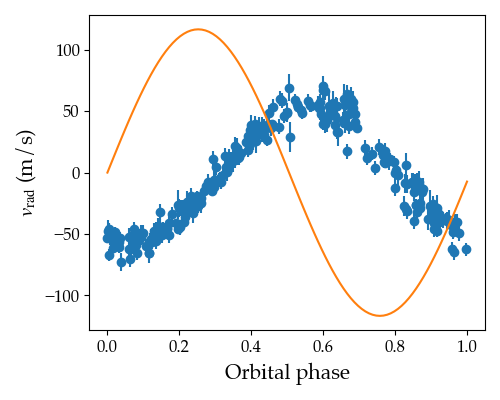

In [4]:
# Create planet mass slider
w_mass_peg = widgets.FloatSlider(
    value=1.0,
    min=0,
    max=10.0,
    step=0.01,
    description='Planet Mass (MJ):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Create shift slider
w_shift_peg = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=1.0,
    step=0.01,
    description='Phase shift:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

Mstar_peg = 1.12  # Stellar mass in Mstar 
Porb_peg = 4.231  # Orbit in days
semi_major_peg = 0.052 # Semi-major axis in AU

# Jupiter mass planet by default
orb = nb.Orbit(mass_ratio=0.001/Mstar_peg, eccentricity=0)

# Display sliders
output = widgets.Output()
display(w_mass_peg, output)
display(w_shift_peg, output)

fig_peg = plt.figure(figsize=(5,4),num='51 Peg b')
ax_peg = plt.gca()
ax_peg.set_xlabel(r'Orbital phase', fontsize=15)
ax_peg.set_ylabel(r'$v_{\rm rad}$ (m/s)', fontsize=15)

data = np.loadtxt('radvel_51peg.dat')
time = ((data[:,0] - data[0,0]) % Porb_peg)/Porb_peg
radvel = data[:,1]
ax_peg.errorbar(time, radvel, yerr=data[:,2], fmt='o',zorder=1)

# Stellar velocity is in AU/year: convert to m/s
velocity_fac_peg = 4740.57172/np.sqrt(semi_major_peg)
pfit_peg, = ax_peg.plot(orb.time, orb.star_vel[:,0]*velocity_fac_peg, zorder=2)

current_ecc_peg = 0
current_per_peg = 0
current_mass_peg = 0.001/Mstar_peg
current_shift_peg = 0

# When slider is moved, update animation
def on_value_change_mass(change):
    with output:
        global current_ecc_peg, current_per_peg, current_mass_peg, current_shift_peg
        current_mass_peg = change['new']*0.001/Mstar_peg
        orb = nb.Orbit(mass_ratio=current_mass_peg, eccentricity=current_ecc_peg, longitude_pericentre=current_per_peg)
        x = orb.time
        y = np.roll(orb.star_vel[:,0], int(current_shift_peg*len(x)))*velocity_fac_peg
        pfit_peg.set_data(x, y)

# When slider is moved, update animation
def on_value_change_shift(change):
    with output:
        global current_ecc_peg, current_per_peg, current_mass_peg, current_shift_peg
        current_shift_peg = change['new']
        orb = nb.Orbit(mass_ratio=current_mass_peg, eccentricity=current_ecc_peg, longitude_pericentre=current_per_peg)
        x = orb.time
        y = np.roll(orb.star_vel[:,0], int(current_shift_peg*len(x)))*velocity_fac_peg
        pfit_peg.set_data(x, y)

w_mass_peg.observe(on_value_change_mass, names='value')
w_shift_peg.observe(on_value_change_shift, names='value')

plt.tight_layout()

<h2> An eccentric planet: HD 160691</h2>

We now turn to one of the planets orbiting around HD 160691, or Mu Arae. The star has a mass of $M_*=1.08~M_\odot$, and a radial velocity signal was found in 2000 with period $743.5$ days. This corresponds to a semi-major axis of $1.61$ AU. From the measurements below it is clear that this planet is on an eccentric orbit. What is the best bit you can obtain by moving the sliders? 

FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

FloatSlider(value=0.0, continuous_update=False, description='Longitude of pericentre:', max=6.283185307179586,…

Output()

FloatSlider(value=1.0, continuous_update=False, description='Planet Mass (MJ):', max=10.0, step=0.01)

Output()

FloatSlider(value=0.0, continuous_update=False, description='Phase shift:', max=1.0, step=0.01)

Output()

<IPython.core.display.Javascript object>


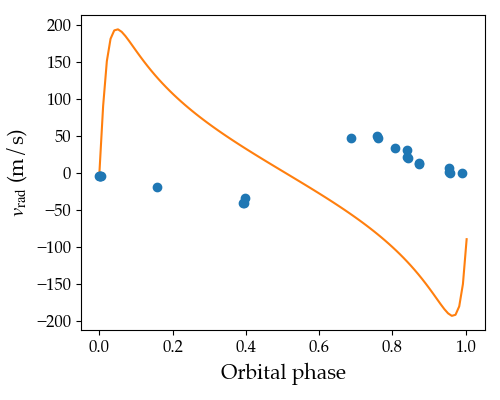

In [5]:
# Create eccentricity slider
w_ecc_hd = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Create eccentricity slider
w_per_hd = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=2.0*np.pi,
    step=0.01,
    description='Longitude of pericentre:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Create eccentricity slider
w_mass_hd = widgets.FloatSlider(
    value=1.0,
    min=0,
    max=10.0,
    step=0.01,
    description='Planet Mass (MJ):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Create shift slider
w_shift_hd = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=1.0,
    step=0.01,
    description='Phase shift:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

Mstar_hd = 1.08
Porb_hd = 743.5
semi_major_hd = 1.65
velocity_fac_hd = 4740.57172/np.sqrt(semi_major_hd)

orb_hd = nb.Orbit(mass_ratio=0.001/Mstar_hd, eccentricity=0)

# Display eccentricity slider
output = widgets.Output()
display(w_ecc_hd, output)
display(w_per_hd, output)
display(w_mass_hd, output)
display(w_shift_hd, output)

fig_obs2 = plt.figure(figsize=(5,4),num='HD 160691')
ax_obs2 = plt.gca()
ax_obs2.set_xlabel(r'Orbital phase', fontsize=15)
ax_obs2.set_ylabel(r'$v_{\rm rad}$ (m/s)', fontsize=15)

# Radvel3: HD 160691: P=743.5, Mp/M* = 1.97*0.001/1.08, e=0.62
data = np.loadtxt('radvel_ecc.dat')
time_hd = ((data[0,:] - data[0,0]) % Porb_hd)/Porb_hd 
radvel_hd = data[1,:]
ax_obs2.errorbar(time_hd, radvel_hd, yerr=data[2,:], fmt='o')
pfit, = ax_obs2.plot(orb_hd.time, orb_hd.star_vel[:,0]*velocity_fac_hd)

current_ecc_hd = 0
current_per_hd = 0
current_mass_hd = 0.001/Mstar_hd
current_shift_hd = 0

# When slider is moved, update animation
def on_value_change_ecc(change):
    with output:
        global current_ecc_hd, current_per_hd, current_mass_hd, current_shift_hd
        current_ecc_hd = change['new']
        orb = nb.Orbit(mass_ratio=current_mass_hd, eccentricity=current_ecc_hd, longitude_pericentre=current_per_hd)
        x = orb.time
        y = np.roll(orb.star_vel[:,0], int(current_shift_hd*len(x)))*velocity_fac_hd
        pfit.set_data(x, y)
        ax_obs2.relim()
        ax_obs2.autoscale()
        
# When slider is moved, update animation
def on_value_change_per(change):
    with output:
        global current_ecc_hd, current_per_hd, current_mass_hd, current_shift_hd
        current_per_hd = change['new']
        orb = nb.Orbit(mass_ratio=current_mass_hd, eccentricity=current_ecc_hd, longitude_pericentre=current_per_hd)
        x = orb.time
        y = np.roll(orb.star_vel[:,0], int(current_shift_hd*len(x)))*velocity_fac_hd
        pfit.set_data(x, y)
        ax_obs2.relim()
        ax_obs2.autoscale()

# When slider is moved, update animation
def on_value_change_mass(change):
    with output:
        global current_ecc_hd, current_per_hd, current_mass_hd, current_shift_hd
        current_mass_hd = change['new']*0.001/Mstar_hd
        orb = nb.Orbit(mass_ratio=current_mass_hd, eccentricity=current_ecc_hd, longitude_pericentre=current_per_hd)
        x = orb.time
        y = np.roll(orb.star_vel[:,0], int(current_shift_hd*len(x)))*velocity_fac_hd
        pfit.set_data(x, y)
        ax_obs2.relim()
        ax_obs2.autoscale()
        

# When slider is moved, update animation
def on_value_change_shift(change):
    with output:
        global current_ecc_hd, current_per_hd, current_mass_hd, current_shift_hd
        current_shift_hd = change['new']
        orb = nb.Orbit(mass_ratio=current_mass_hd, eccentricity=current_ecc_hd, longitude_pericentre=current_per_hd)
        x = orb.time
        y = np.roll(orb.star_vel[:,0], int(current_shift_hd*len(x)))*velocity_fac_hd
        pfit.set_data(x, y)

w_ecc_hd.observe(on_value_change_ecc, names='value')
w_per_hd.observe(on_value_change_per, names='value')
w_mass_hd.observe(on_value_change_mass, names='value')
w_shift_hd.observe(on_value_change_shift, names='value')

plt.tight_layout()

Compare your values to the [current best-fit parameters](https://exoplanets.nasa.gov/exoplanet-catalog/6960/hd-160691-b/). You can try these values and see if they work. Can you think of a reason as to what is causing the difference?